In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist_train=dset.MNIST("",train=True,transform=transforms.ToTensor(),
                       target_transform=None,download=True) #train용으로 사용
mnist_test=dset.MNIST("",train=False,transform=transforms.ToTensor(),
                      target_transform=None,download=True)#test용으로 사용

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


mnist_train길이: 60000
mnist_test길이: 10000
image data 형태: torch.Size([1, 28, 28])
label: 5


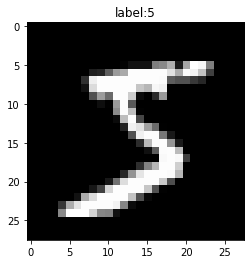

In [3]:
print ("mnist_train길이:",len(mnist_train))
print ("mnist_test길이:",len(mnist_test))

image, label=mnist_train.__getitem__(0)
print ("image data 형태:",image.size())
print ("label:",label)

img=image.numpy()
plt.title("label:%d"%label)
plt.imshow(img[0],cmap='gray')
plt.show()

5
torch.Size([1, 28, 28])
5


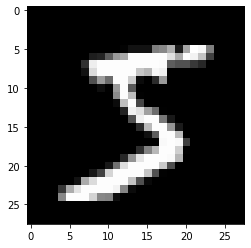

0


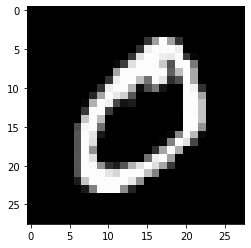

4


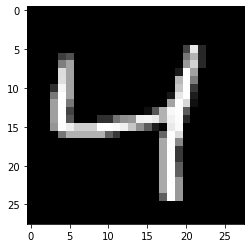

In [4]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
  img=mnist_train[i][0].numpy()
  print(mnist_train[i][1])
  plt.imshow(img[0],cmap='gray')
  plt.show()

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


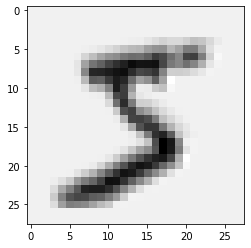

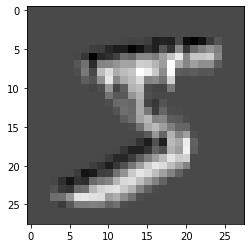

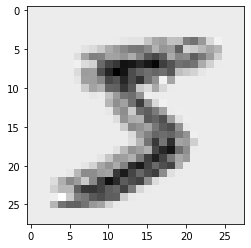

In [5]:
image, label=mnist_train[0]# 첫번쨰 이미지,라벨 가져옴
#view:tensor의 사이즈 조절.-1:해당차원 차원 확장
#[1.28.28]->[1,1,28,28]
image=image.view(-1,image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print(label)

#convolution  fillter 정의
conv_layer=nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,padding=1)
#image에 필터 적용
output=conv_layer(Variable(image))
print(output.size())

for i in range(3):
  plt.imshow(output[0,i,:,:].data.numpy(),cmap='gray')
  plt.show()
  #(batch size,channel,height,width)